In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import requests
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1


In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

In [3]:
dfs = pd.read_html(url)

In [4]:
df = dfs[4]

In [5]:
df.head(10)

,2020rank,City,State[c],2020estimate,2010census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location
0,1,New York[d],New York,8253213,8175133,+0.96%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",".mw-parser-output .geo-default,.mw-parser-outp..."
1,2,Los Angeles,California,3970219,3792621,+4.68%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′N 118°25′W﻿ / ﻿34.01°N 118.41°W
2,3,Chicago,Illinois,2677643,2695598,−0.67%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′N 87°41′W﻿ / ﻿41.83°N 87.68°W
3,4,Houston,Texas,2316120,2100263,+10.28%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′N 95°23′W﻿ / ﻿29.78°N 95.39°W
4,5,Phoenix,Arizona,1708127,1445632,+18.16%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′N 112°05′W﻿ / ﻿33.57°N 112.09°W
5,6,Philadelphia[e],Pennsylvania,1578487,1526006,+3.44%,134.2 sq mi,347.6 km2,"11,683/sq mi","4,511/km2",40°00′N 75°08′W﻿ / ﻿40.00°N 75.13°W
6,7,San Antonio,Texas,1567118,1327407,+18.06%,461.0 sq mi,"1,194.0 km2","3,238/sq mi","1,250/km2",29°28′N 98°31′W﻿ / ﻿29.47°N 98.52°W
7,8,San Diego,California,1422420,1307402,+8.80%,325.2 sq mi,842.3 km2,"4,325/sq mi","1,670/km2",32°49′N 117°08′W﻿ / ﻿32.81°N 117.13°W
8,9,Dallas,Texas,1343266,1197816,+12.14%,340.9 sq mi,882.9 km2,"3,866/sq mi","1,493/km2",32°47′N 96°46′W﻿ / ﻿32.79°N 96.76°W
9,10,San Jose,California,1013616,945942,+7.15%,177.5 sq mi,459.7 km2,"5,777/sq mi","2,231/km2",37°17′N 121°49′W﻿ / ﻿37.29°N 121.81°W


In [6]:
df1 = df.drop(columns=['2010census', 'Change', '2016 land area.1', '2016 population density', '2016 population density.1', 'Location'])

In [7]:
df1.rename(columns = {'2020rank':'Rank', 'State[c]':'State', '2020estimate':'Population', '2016 land area' : 'Land Area' }, inplace = True)
df1.head(10)                            

,Rank,City,State,Population,Land Area
0,1,New York[d],New York,8253213,301.5 sq mi
1,2,Los Angeles,California,3970219,468.7 sq mi
2,3,Chicago,Illinois,2677643,227.3 sq mi
3,4,Houston,Texas,2316120,637.5 sq mi
4,5,Phoenix,Arizona,1708127,517.6 sq mi
5,6,Philadelphia[e],Pennsylvania,1578487,134.2 sq mi
6,7,San Antonio,Texas,1567118,461.0 sq mi
7,8,San Diego,California,1422420,325.2 sq mi
8,9,Dallas,Texas,1343266,340.9 sq mi
9,10,San Jose,California,1013616,177.5 sq mi


In [8]:
df2 = df1.replace({'New York[d]': 'New York City', 'Houston[3]': 'Houston', 'Philadelphia[e]': 'Philadelphia'})
df2.head(10)

,Rank,City,State,Population,Land Area
0,1,New York City,New York,8253213,301.5 sq mi
1,2,Los Angeles,California,3970219,468.7 sq mi
2,3,Chicago,Illinois,2677643,227.3 sq mi
3,4,Houston,Texas,2316120,637.5 sq mi
4,5,Phoenix,Arizona,1708127,517.6 sq mi
5,6,Philadelphia,Pennsylvania,1578487,134.2 sq mi
6,7,San Antonio,Texas,1567118,461.0 sq mi
7,8,San Diego,California,1422420,325.2 sq mi
8,9,Dallas,Texas,1343266,340.9 sq mi
9,10,San Jose,California,1013616,177.5 sq mi


In [9]:
df2.drop(df2.index[7:317],0,inplace=True)
df2

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Rank,City,State,Population,Land Area
0,1,New York City,New York,8253213,301.5 sq mi
1,2,Los Angeles,California,3970219,468.7 sq mi
2,3,Chicago,Illinois,2677643,227.3 sq mi
3,4,Houston,Texas,2316120,637.5 sq mi
4,5,Phoenix,Arizona,1708127,517.6 sq mi
5,6,Philadelphia,Pennsylvania,1578487,134.2 sq mi
6,7,San Antonio,Texas,1567118,461.0 sq mi


In [10]:
df3 = df2.assign(Number_of_Sports_Teams =[11, 10, 6, 4, 4, 5, 1])
df3

,Rank,City,State,Population,Land Area,Number_of_Sports_Teams
0,1,New York City,New York,8253213,301.5 sq mi,11
1,2,Los Angeles,California,3970219,468.7 sq mi,10
2,3,Chicago,Illinois,2677643,227.3 sq mi,6
3,4,Houston,Texas,2316120,637.5 sq mi,4
4,5,Phoenix,Arizona,1708127,517.6 sq mi,4
5,6,Philadelphia,Pennsylvania,1578487,134.2 sq mi,5
6,7,San Antonio,Texas,1567118,461.0 sq mi,1


In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.4.2


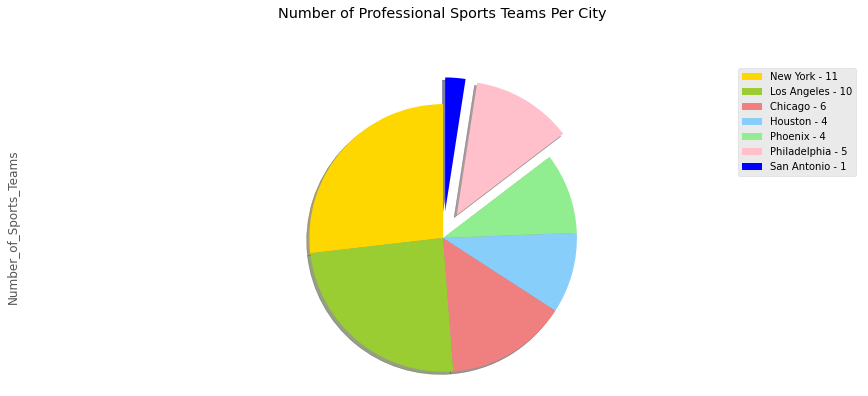

In [12]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'blue']
explode_list = [0, 0, 0, 0, 0, 0.2, 0.2]
labels = ['New York - 11', 'Los Angeles - 10', 'Chicago - 6', 'Houston - 4', 'Phoenix - 4', 'Philadelphia - 5', 'San Antonio - 1']

df3['Number_of_Sports_Teams'].plot(kind='pie',
                            figsize=(15, 6), 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list
                            )

plt.title('Number of Professional Sports Teams Per City', y=1.12) 

plt.axis('equal') 

plt.legend(labels, loc='best') 

plt.show()

In [13]:
df4 = pd.DataFrame({'Zip Code': [78205,78210,78212,78213,78219,78228,78233,78240,78247,78252,78254,78260],
                    'County' : ['Bexar','Bexar','Bexar','Bexar','Bexar','Bexar','Bexar','Bexar','Bexar','Bexar','Bexar','Bexar'],
                   'Neighborhood' : ['Downtown','Southtown','Midtown','North Central','East Side','West Side','Uptown','Northwest','Northeast','Southside','Far West','Far North'],
                   'Latitude' : [29.424275,29.395806,29.464571,29.515413,29.44215,29.461039,29.554849,29.524648,29.579509,29.347076,29.5296,29.693359],
                   'Longitude' : [-98.48764,-98.46378,-98.49171,-98.52303,-98.38869,-98.5719,-98.36473,-98.60789,-98.41302,-98.71572,-98.7875,-98.49024]})

In [14]:
df4

,Zip Code,County,Neighborhood,Latitude,Longitude
0,78205,Bexar,Downtown,29.424275,-98.48764
1,78210,Bexar,Southtown,29.395806,-98.46378
2,78212,Bexar,Midtown,29.464571,-98.49171
3,78213,Bexar,North Central,29.515413,-98.52303
4,78219,Bexar,East Side,29.442150,-98.38869
5,78228,Bexar,West Side,29.461039,-98.57190
6,78233,Bexar,Uptown,29.554849,-98.36473
7,78240,Bexar,Northwest,29.524648,-98.60789
8,78247,Bexar,Northeast,29.579509,-98.41302
9,78252,Bexar,Southside,29.347076,-98.71572


In [15]:
address = 'San Antonio, TX'

geolocator = Nominatim(user_agent="sa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of San Antonio are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of San Antonio are 29.4246002, -98.4951405.


In [16]:
map_sanantonio = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, county, neighborhood in zip(df4['Latitude'], df4['Longitude'], df4['County'], df4['Neighborhood']):
    label = '{}, {}'.format(neighborhood, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanantonio)  
    
map_sanantonio

In [17]:
CLIENT_ID = 'J2M435OVE3EZU1AQR3QMUEQR4XCDAOB0SS4VRVHK4YIPFMYF'
CLIENT_SECRET = 'LILSZO3CF2K0ZJ1CDJY2BUUMJ2B1TCND2QNTIJQFOJAXFVLP'
VERSION = '20180605'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J2M435OVE3EZU1AQR3QMUEQR4XCDAOB0SS4VRVHK4YIPFMYF
CLIENT_SECRET:LILSZO3CF2K0ZJ1CDJY2BUUMJ2B1TCND2QNTIJQFOJAXFVLP


In [18]:
neighborhood_latitude = df4.loc[0,'Latitude']
neighborhood_longitude = df4.loc[0,'Longitude']

neighborhood_name = df4.loc[0,'Neighborhood']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Downtown are 29.424275, -98.48764.


In [19]:
limit = 100
radius = 500
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url1

'https://api.foursquare.com/v2/venues/explore?&client_id=J2M435OVE3EZU1AQR3QMUEQR4XCDAOB0SS4VRVHK4YIPFMYF&client_secret=LILSZO3CF2K0ZJ1CDJY2BUUMJ2B1TCND2QNTIJQFOJAXFVLP&v=20180605&ll=29.424275,-98.48764&radius=500&limit=100'

In [20]:
results = requests.get(url1).json()
results

{'meta': {'code': 200, 'requestId': '60e08efd1c315e2680a332a5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Alamo Plaza',
  'headerFullLocation': 'Alamo Plaza, San Antonio',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 173,
  'suggestedBounds': {'ne': {'lat': 29.428775004500007,
    'lng': -98.48248319995629},
   'sw': {'lat': 29.419774995499996, 'lng': -98.4927968000437}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c2785965c5ca59305e547fe',
       'name': 'The San Antonio River Walk',
       'location': {'address': 'San Antonio River',
        'lat': 29.42431061551175,
        'lng': -98.48855807876475,
       

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,The San Antonio River Walk,Pedestrian Plaza,29.424311,-98.488558
1,Alamo Plaza,Plaza,29.425484,-98.486613
2,Fortress Alamo: The Key To Texas,History Museum,29.425306,-98.486392
3,Rocky Mountain Chocolate Factory,Dessert Shop,29.424405,-98.488331
4,Kilwins,Ice Cream Shop,29.424076,-98.487326


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
sa_venues = getNearbyVenues(names=df4['Neighborhood'],
                                   latitudes=df4['Latitude'],
                                   longitudes=df4['Longitude']
                                  )

Downtown
Southtown
Midtown
North Central
East Side
West Side
Uptown
Northwest
Northeast
Southside
Far West
Far North


In [26]:
print(sa_venues.shape)
sa_venues.head()

(132, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,29.424275,-98.48764,The San Antonio River Walk,29.424311,-98.488558,Pedestrian Plaza
1,Downtown,29.424275,-98.48764,Alamo Plaza,29.425484,-98.486613,Plaza
2,Downtown,29.424275,-98.48764,Fortress Alamo: The Key To Texas,29.425306,-98.486392,History Museum
3,Downtown,29.424275,-98.48764,Rocky Mountain Chocolate Factory,29.424405,-98.488331,Dessert Shop
4,Downtown,29.424275,-98.48764,Kilwins,29.424076,-98.487326,Ice Cream Shop


In [27]:
sa_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Downtown,100,100,100,100,100,100
Far North,2,2,2,2,2,2
Midtown,6,6,6,6,6,6
North Central,15,15,15,15,15,15
Northwest,3,3,3,3,3,3
Southtown,1,1,1,1,1,1
Uptown,2,2,2,2,2,2
West Side,3,3,3,3,3,3


In [28]:
print('There are {} uniques categories.'.format(len(sa_venues['Venue Category'].unique())))

There are 70 uniques categories.


In [29]:
sa_onehot = pd.get_dummies(sa_venues[['Venue Category']], prefix="", prefix_sep="")

sa_onehot['Neighborhood'] = sa_venues['Neighborhood'] 

fixed_columns = [sa_onehot.columns[-1]] + list(sa_onehot.columns[:-1])
sa_onehot = sa_onehot[fixed_columns]

sa_onehot.head()

,Wings Joint,American Restaurant,Art Museum,BBQ Joint,Bakery,Bar,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Café,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cuban Restaurant,Dessert Shop,Discount Store,Fast Food Restaurant,Food,Food & Drink Shop,Food Truck,Gas Station,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Historic Site,History Museum,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Lingerie Store,Liquor Store,Locksmith,Lounge,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Store,Neighborhood,Nightclub,Pedestrian Plaza,Pharmacy,Piano Bar,Plaza,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Smoke Shop,Spanish Restaurant,Sports Bar,Steakhouse,Storage Facility,Sushi Restaurant,Theater,Theme Restaurant,Toy / Game Store,Video Store,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Downtown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Downtown,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
sa_onehot.shape

(132, 70)

In [31]:
sa_grouped = sa_onehot.groupby('Neighborhood').mean().reset_index()
sa_grouped

,Neighborhood,Wings Joint,American Restaurant,Art Museum,BBQ Joint,Bakery,Bar,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Café,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cuban Restaurant,Dessert Shop,Discount Store,Fast Food Restaurant,Food,Food & Drink Shop,Food Truck,Gas Station,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Historic Site,History Museum,Hotel,Ice Cream Shop,Intersection,Italian Restaurant,Lingerie Store,Liquor Store,Locksmith,Lounge,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Store,Nightclub,Pedestrian Plaza,Pharmacy,Piano Bar,Plaza,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Smoke Shop,Spanish Restaurant,Sports Bar,Steakhouse,Storage Facility,Sushi Restaurant,Theater,Theme Restaurant,Toy / Game Store,Video Store,Wine Bar
0,Downtown,0.000000,0.03,0.01,0.02,0.02,0.060000,0.01,0.01,0.01,0.0,0.010000,0.01,0.01,0.02,0.02,0.0,0.01,0.000000,0.02,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.01,0.01,0.01,0.000000,0.02,0.02,0.2,0.040000,0.000000,0.02,0.01,0.000000,0.0,0.01,0.01,0.020000,0.01,0.02,0.000000,0.02,0.01,0.01,0.01,0.02,0.0,0.01,0.01,0.01,0.000000,0.020000,0.02,0.000000,0.02,0.000000,0.01,0.01,0.05,0.000000,0.01,0.04,0.01,0.01,0.000000,0.01
1,Far North,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.5,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
2,Midtown,0.000000,0.00,0.00,0.00,0.00,0.166667,0.00,0.00,0.00,0.0,0.166667,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.00,0.333333,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.166667,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
3,North Central,0.066667,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.066667,0.00,0.000000,0.066667,0.0,0.066667,0.000000,0.066667,0.00,0.00,0.00,0.066667,0.00,0.00,0.0,0.066667,0.066667,0.00,0.00,0.066667,0.0,0.00,0.00,0.133333,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.066667,0.066667,0.00,0.000000,0.00,0.066667,0.00,0.00,0.00,0.066667,0.00,0.00,0.00,0.00,0.000000,0.00
4,Northwest,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.666667,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.333333,0.00
5,Southtown,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,1.0,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
6,Uptown,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.5,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
7,West Side,0.333333,0.00,0.00,0.00,0.00,0.

In [32]:
sa_grouped.shape

(8, 70)

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sa_grouped['Neighborhood']

for ind in np.arange(sa_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sa_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater,American Restaurant,Seafood Restaurant,History Museum,Historic Site,Mexican Restaurant
1,Far North,Coffee Shop,Pool,Wings Joint,Restaurant,Pub,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub
2,Midtown,Mexican Restaurant,Burger Joint,Shipping Store,Bar,Discount Store,Mediterranean Restaurant,Movie Theater,Museum,Music Store,Nightclub
3,North Central,Mexican Restaurant,Sandwich Place,Liquor Store,Intersection,Ice Cream Shop,Grocery Store,Gas Station,Food & Drink Shop,Fast Food Restaurant,Cuban Restaurant
4,Northwest,Grocery Store,Video Store,Wings Joint,Music Store,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub


In [35]:
kclusters = 5

sa_grouped_clustering = sa_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sa_grouped_clustering)

kmeans.labels_[0:10] 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


array([1, 0, 1, 1, 4, 3, 2, 1], dtype=int32)

In [36]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sa_merged = df4

sa_merged = sa_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sa_merged.head()

,Zip Code,County,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,78205,Bexar,Downtown,29.424275,-98.48764,1.0,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater,American Restaurant,Seafood Restaurant,History Museum,Historic Site,Mexican Restaurant
1,78210,Bexar,Southtown,29.395806,-98.46378,3.0,Buffet,Restaurant,Pub,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub,Wings Joint
2,78212,Bexar,Midtown,29.464571,-98.49171,1.0,Mexican Restaurant,Burger Joint,Shipping Store,Bar,Discount Store,Mediterranean Restaurant,Movie Theater,Museum,Music Store,Nightclub
3,78213,Bexar,North Central,29.515413,-98.52303,1.0,Mexican Restaurant,Sandwich Place,Liquor Store,Intersection,Ice Cream Shop,Grocery Store,Gas Station,Food & Drink Shop,Fast Food Restaurant,Cuban Restaurant
4,78219,Bexar,East Side,29.442150,-98.38869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
sa_merged.dropna(subset=['Cluster Labels'] , inplace = True)
sa_merged

,Zip Code,County,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,78205,Bexar,Downtown,29.424275,-98.48764,1.0,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater,American Restaurant,Seafood Restaurant,History Museum,Historic Site,Mexican Restaurant
1,78210,Bexar,Southtown,29.395806,-98.46378,3.0,Buffet,Restaurant,Pub,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub,Wings Joint
2,78212,Bexar,Midtown,29.464571,-98.49171,1.0,Mexican Restaurant,Burger Joint,Shipping Store,Bar,Discount Store,Mediterranean Restaurant,Movie Theater,Museum,Music Store,Nightclub
3,78213,Bexar,North Central,29.515413,-98.52303,1.0,Mexican Restaurant,Sandwich Place,Liquor Store,Intersection,Ice Cream Shop,Grocery Store,Gas Station,Food & Drink Shop,Fast Food Restaurant,Cuban Restaurant
5,78228,Bexar,West Side,29.461039,-98.57190,1.0,Wings Joint,Food Truck,Music Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Rental Car Location,Nightclub
6,78233,Bexar,Uptown,29.554849,-98.36473,2.0,Locksmith,Food,Wings Joint,Nightclub,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Music Store
7,78240,Bexar,Northwest,29.524648,-98.60789,4.0,Grocery Store,Video Store,Wings Joint,Music Store,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub
11,78260,Bexar,Far North,29.693359,-98.49024,0.0,Coffee Shop,Pool,Wings Joint,Restaurant,Pub,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub


In [38]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(sa_merged['Latitude'], sa_merged['Longitude'], sa_merged['Neighborhood'], sa_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [39]:
sa_merged.loc[sa_merged['Cluster Labels'] == 0, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Bexar,0.0,Coffee Shop,Pool,Wings Joint,Restaurant,Pub,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub


Cluster 2

In [40]:
sa_merged.loc[sa_merged['Cluster Labels'] == 1, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bexar,1.0,Hotel,Bar,Steakhouse,Ice Cream Shop,Theater,American Restaurant,Seafood Restaurant,History Museum,Historic Site,Mexican Restaurant
2,Bexar,1.0,Mexican Restaurant,Burger Joint,Shipping Store,Bar,Discount Store,Mediterranean Restaurant,Movie Theater,Museum,Music Store,Nightclub
3,Bexar,1.0,Mexican Restaurant,Sandwich Place,Liquor Store,Intersection,Ice Cream Shop,Grocery Store,Gas Station,Food & Drink Shop,Fast Food Restaurant,Cuban Restaurant
5,Bexar,1.0,Wings Joint,Food Truck,Music Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Rental Car Location,Nightclub


Cluster 3

In [41]:
sa_merged.loc[sa_merged['Cluster Labels'] == 2, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Bexar,2.0,Locksmith,Food,Wings Joint,Nightclub,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Music Store


Cluster 4

In [42]:
sa_merged.loc[sa_merged['Cluster Labels'] == 3, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bexar,3.0,Buffet,Restaurant,Pub,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub,Wings Joint


Cluster 5

In [43]:
sa_merged.loc[sa_merged['Cluster Labels'] == 4, sa_merged.columns[[1] + list(range(5, sa_merged.shape[1]))]]

,County,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Bexar,4.0,Grocery Store,Video Store,Wings Joint,Music Store,Pool,Plaza,Piano Bar,Pharmacy,Pedestrian Plaza,Nightclub


Revenue

In [44]:
df2.drop(df2.index[7:317],0,inplace=True)
df2

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Rank,City,State,Population,Land Area
0,1,New York City,New York,8253213,301.5 sq mi
1,2,Los Angeles,California,3970219,468.7 sq mi
2,3,Chicago,Illinois,2677643,227.3 sq mi
3,4,Houston,Texas,2316120,637.5 sq mi
4,5,Phoenix,Arizona,1708127,517.6 sq mi
5,6,Philadelphia,Pennsylvania,1578487,134.2 sq mi
6,7,San Antonio,Texas,1567118,461.0 sq mi


In [45]:
df5 = df2.assign(Team =['Yankees', 'Dodgers', 'Cubs','Astros', 'Diamondbacks', 'Phillies', np.nan],
                 Attendance_Per_Game =[40795, 49066, 38208, 35276, 26364, 33672, np.nan],
                 Year_Revenue_Millions=[109, 131 , 102, 94, 70, 90, np.nan])
df5

,Rank,City,State,Population,Land Area,Team,Attendance_Per_Game,Year_Revenue_Millions
0,1,New York City,New York,8253213,301.5 sq mi,Yankees,40795.0,109.0
1,2,Los Angeles,California,3970219,468.7 sq mi,Dodgers,49066.0,131.0
2,3,Chicago,Illinois,2677643,227.3 sq mi,Cubs,38208.0,102.0
3,4,Houston,Texas,2316120,637.5 sq mi,Astros,35276.0,94.0
4,5,Phoenix,Arizona,1708127,517.6 sq mi,Diamondbacks,26364.0,70.0
5,6,Philadelphia,Pennsylvania,1578487,134.2 sq mi,Phillies,33672.0,90.0
6,7,San Antonio,Texas,1567118,461.0 sq mi,NaN,NaN,NaN


In [46]:
df6 = df5.drop(columns=['Population', 'Land Area'])
df6

,Rank,City,State,Team,Attendance_Per_Game,Year_Revenue_Millions
0,1,New York City,New York,Yankees,40795.0,109.0
1,2,Los Angeles,California,Dodgers,49066.0,131.0
2,3,Chicago,Illinois,Cubs,38208.0,102.0
3,4,Houston,Texas,Astros,35276.0,94.0
4,5,Phoenix,Arizona,Diamondbacks,26364.0,70.0
5,6,Philadelphia,Pennsylvania,Phillies,33672.0,90.0
6,7,San Antonio,Texas,NaN,NaN,NaN


In [47]:
df7 = df6[['Attendance_Per_Game','Year_Revenue_Millions']].fillna(value=df6[['Attendance_Per_Game','Year_Revenue_Millions']].mean())
df7

,Attendance_Per_Game,Year_Revenue_Millions
0,40795.000000,109.000000
1,49066.000000,131.000000
2,38208.000000,102.000000
3,35276.000000,94.000000
4,26364.000000,70.000000
5,33672.000000,90.000000
6,37230.166667,99.333333


In [48]:
df8 = df2.assign(Team =['Yankees', 'Dodgers', 'Cubs','Astros', 'Diamondbacks', 'Phillies', 'NA'],
                 Attendance_Per_Game =[40795, 49066, 38208, 35276, 26364, 33672, 37230],
                 Year_Revenue_Millions=[109.0, 131.0 , 102.0, 94.0, 70.0, 90.0, 99.3])
df8

,Rank,City,State,Population,Land Area,Team,Attendance_Per_Game,Year_Revenue_Millions
0,1,New York City,New York,8253213,301.5 sq mi,Yankees,40795,109.0
1,2,Los Angeles,California,3970219,468.7 sq mi,Dodgers,49066,131.0
2,3,Chicago,Illinois,2677643,227.3 sq mi,Cubs,38208,102.0
3,4,Houston,Texas,2316120,637.5 sq mi,Astros,35276,94.0
4,5,Phoenix,Arizona,1708127,517.6 sq mi,Diamondbacks,26364,70.0
5,6,Philadelphia,Pennsylvania,1578487,134.2 sq mi,Phillies,33672,90.0
6,7,San Antonio,Texas,1567118,461.0 sq mi,NA,37230,99.3


In [49]:
df9 = df8.drop(columns=['Population', 'Land Area'])
df9

,Rank,City,State,Team,Attendance_Per_Game,Year_Revenue_Millions
0,1,New York City,New York,Yankees,40795,109.0
1,2,Los Angeles,California,Dodgers,49066,131.0
2,3,Chicago,Illinois,Cubs,38208,102.0
3,4,Houston,Texas,Astros,35276,94.0
4,5,Phoenix,Arizona,Diamondbacks,26364,70.0
5,6,Philadelphia,Pennsylvania,Phillies,33672,90.0
6,7,San Antonio,Texas,NA,37230,99.3


In [50]:
df10 = df9[['Team', 'Year_Revenue_Millions']]
df10

,Team,Year_Revenue_Millions
0,Yankees,109.0
1,Dodgers,131.0
2,Cubs,102.0
3,Astros,94.0
4,Diamondbacks,70.0
5,Phillies,90.0
6,NA,99.3


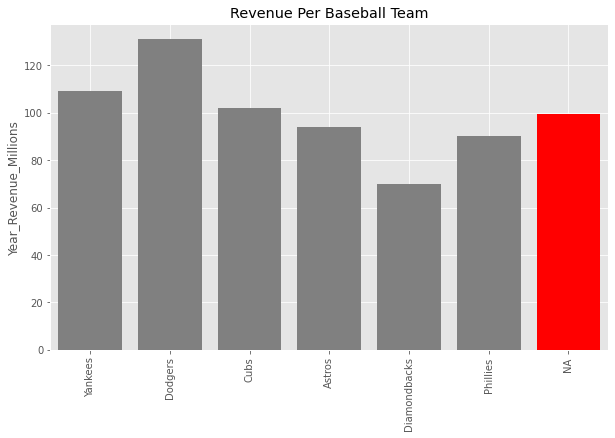

In [51]:
positions = [0, 1, 2, 3, 4, 5, 6]
labels = ['Yankees', 'Dodgers', 'Cubs','Astros', 'Diamondbacks', 'Phillies', 'NA']
y = [109.0, 131.0 , 102.0, 94.0, 70.0, 90.0, 99.3]

df10.plot(kind='bar', figsize=(10, 6), legend = None)
          
plt.ylabel('Year_Revenue_Millions')
plt.title('Revenue Per Baseball Team')
plt.bar(labels, y, color=['gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'red'])
plt.xticks(positions, labels)

plt.show()